# Dataset Overview:

Link: https://www.kaggle.com/datasets/camnugent/california-housing-prices

The California Housing dataset is a classic dataset frequently used in machine learning and statistics. It contains data on various housing districts in California, making it valuable for analyzing housing market trends and making predictions about housing prices.

## Features:

• Geographic information such as longitude and latitude coordinates, allowing for spatial analysis.

• Housing characteristics like median age, total rooms, total bedrooms, population, and households, providing insights into the demographics and living conditions of different districts.

• Median income of households, a crucial socio-economic factor influencing housing prices.

• Ocean proximity, which could impact housing demand and value.


## Target: 
•  Median house value, serving as the primary target for predictive modeling. This metric is crucial for homeowners, real estate agents, investors, and policymakers in understanding property values and making informed decisions

## Business Value:

#### Real Estate Market Analysis: 
Real estate agents and property investors can leverage machine learning models trained on this dataset to analyze market trends, identify profitable investment opportunities, and optimize pricing strategies.

#### Property Valuation: 
Accurately predicting house prices helps homeowners, buyers, and sellers make informed decisions about buying, selling, or investing in properties.

## Brief summary of the taken steps:

### Data Loading and Exploration:

• Loaded the dataset and displayed information about its structure.

• Visualized histograms of numerical columns to understand their distributions.

### Data Preprocessing:

• Created a new categorical attribute income_cat based on the median_income for stratified sampling.

• Split the dataset into training and testing sets using both train_test_split and StratifiedShuffleSplit methods.

• Removed the income_cat column from various subsets of the dataset.

### Feature Engineering:

• Calculated additional features based on correlation analysis: population_per_household, bedrooms_per_room, rooms_per_household.

### Data Preparation:

• Preprocessed the data using pipelines, including scaling numerical features and encoding categorical features.

### Model Training:

• Trained three different models: Linear Regression, Random Forest Regression, and Support Vector Machine (SVM).

• Evaluated each model's performance using Mean Squared Error (MSE) and visualized actual vs. predicted values.

### Model Evaluation:

• Fine-tuned the Random Forest Regression and SVM models using Randomized Search Cross Validation.
• Calculated and compared the MSE for each model on the test set.

### Final Results:

• Displayed the actual vs. predicted values for each model, along with the differences.

### The Random Forest Regression model achieved the lowest MSE, indicating superior performance compared to Linear Regression and Support Vector Machine (SVM). This result suggests that Random Forest Regression provides the most accurate predictions for housing prices in California.

In [1]:
import math
import numpy as np
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 42)
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# random seed to make output stable across runs
np.random.seed(42)

# data visualization
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
# Read the data
file_name='housing.csv'
data = pd.read_csv(file_name)

In [3]:
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Display information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Display descriptive statistics of the numerical columns
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feebee977b8>,
      dtype=object)

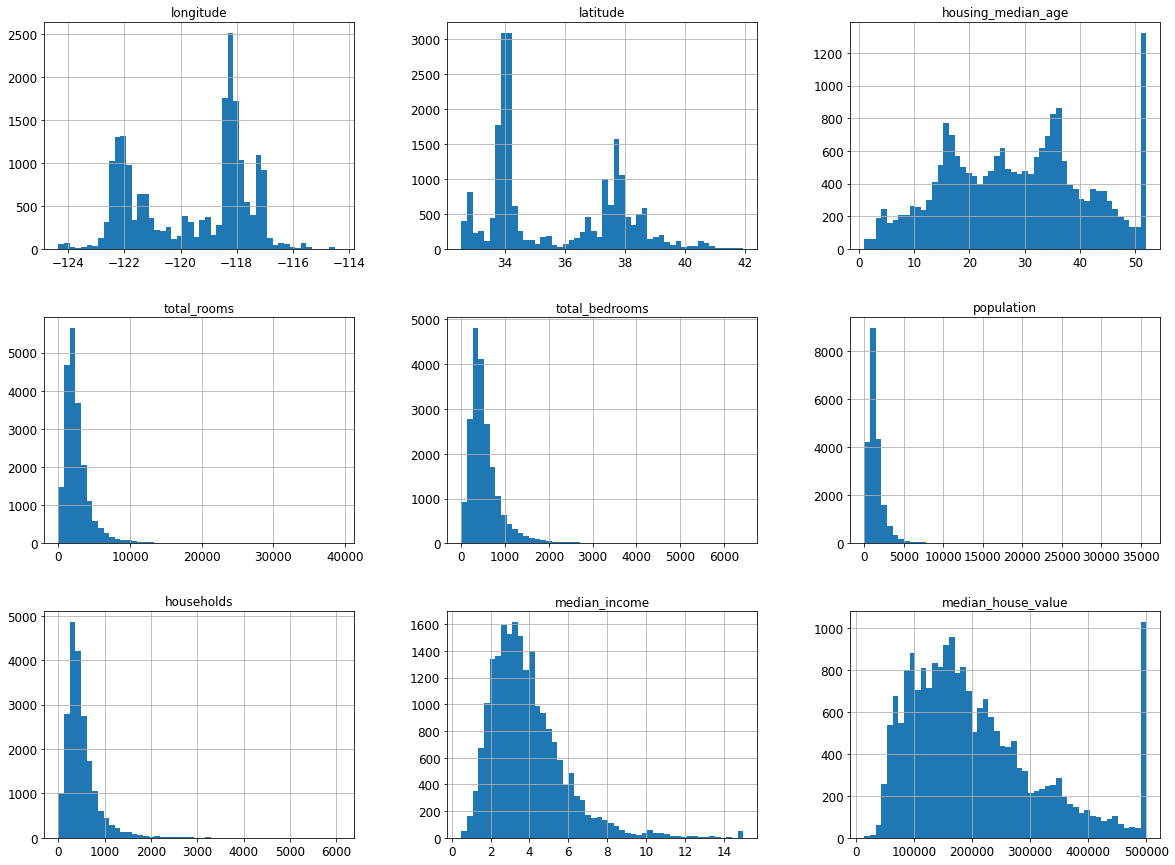

In [6]:
# Visualize histograms of numerical columns
data.hist(bins=50, figsize=(20,15))

## Explanation of Dividing 'median_income' Attribute

The 'median_income' attribute is crucial for predicting housing prices, as it provides valuable information about the income distribution in a locality, which directly influences housing affordability and demand. However, since 'median_income' is a continuous variable, we need to discretize it into categories for better representation in our analysis and modeling process.

By dividing the 'median_income' values by 1.5 and taking the ceiling, we aim to create discrete income categories while ensuring that each category captures a meaningful range of income levels. Dividing by 1.5 helps limit the number of income categories while retaining the granularity necessary to distinguish between different income levels.

Additionally, merging categories with incomes greater than 5 into category 5 ensures that we do not have an excessive number of strata, which could lead to biased estimates of stratum importance. This approach helps maintain the integrity of our stratified sampling process, ensuring that our test set is representative of the income distribution in the dataset and improving the reliability of our predictive model.


In [7]:
# Transforming 'median_income' into categorical attribute for stratified sampling
# Create a new column 'income_cat' by dividing 'median_income' by 1.5 
data['income_cat'] = np.ceil(data['median_income'] / 1.5)

# Replace values in 'income_cat' greater than or equal to 5 with 5, ensuring a limited number of income categories
data['income_cat'].where(data['income_cat'] < 5, 5, inplace=True)

(array([ 822.,    0., 6581.,    0.,    0., 7236.,    0., 3639.,    0.,
        2362.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

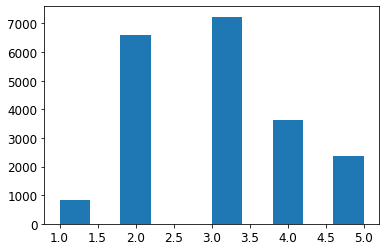

In [8]:
plt.hist(data.income_cat)

In [9]:
#Train-test split
data4train,data4test = train_test_split(data, test_size=0.2, random_state=42)

In [10]:
# Stratified sampling based on 'median_income'
for train_index, test_index in split.split(data, data['income_cat']):
    train_set = data.loc[train_index]
    test_set  = data.loc[test_index] 

In [11]:
# Define a function to create a table of income category proportions
def table4income_cat(dataset,df,label):
    df[label]=pd.Series(dataset['income_cat'].value_counts()/len(dataset['income_cat']))
    return df

In [12]:
#Visualise results to see which method performs better
df = pd.DataFrame()
df = table4income_cat(train_set,df,'All_set')
df = table4income_cat(train_set,df,'train_set_Shuff')
df = table4income_cat(test_set,df,'test_set_Shuff')
df = table4income_cat(data4train,df,'train_set_split')
df = table4income_cat(data4test,df,'test_set_split')
df

,All_set,train_set_Shuff,test_set_Shuff,train_set_split,test_set_split
3.0,0.350594,0.350594,0.350533,0.348595,0.358527
2.0,0.318859,0.318859,0.318798,0.317466,0.324370
4.0,0.176296,0.176296,0.176357,0.178537,0.167393
5.0,0.114402,0.114402,0.114583,0.115673,0.109496
1.0,0.039850,0.039850,0.039729,0.039729,0.040213


It is shown above that the StratifiedShuffleSplit method works a little bit better as the income category propotions in train data and test data are closer to that in the all dataset.

In [13]:
# Remove the 'income_cat' column from the original dataset
data.drop('income_cat', axis=1, inplace=True)

# Remove the 'income_cat' column from the dataset for training
data4train.drop('income_cat', axis=1, inplace=True)

# Remove the 'income_cat' column from the dataset for testing
data4test.drop('income_cat', axis=1, inplace=True)

# Remove the 'income_cat' column from the training set
train_set.drop('income_cat', axis=1, inplace=True)

# Remove the 'income_cat' column from the testing set
test_set.drop('income_cat', axis=1, inplace=True)


/opt/tljh/user/lib/python3.7/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
# Extract features correlated with 'median_house_value'
housing4train = train_set.copy()
housing4train.drop(columns="ocean_proximity", inplace=True)


In [15]:
corr_matrix = housing4train.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [16]:
df = corr_matrix.tail(1).T
df

,median_house_value
longitude,-0.047432
latitude,-0.142724
housing_median_age,0.114110
total_rooms,0.135097
total_bedrooms,0.047689
population,-0.026920
households,0.064506
median_income,0.687160
median_house_value,1.000000


In [17]:
features = list(df[abs(df['median_house_value'])>0.1].T.columns)
features

['latitude',
 'housing_median_age',
 'total_rooms',
 'median_income',
 'median_house_value']

In [18]:

# Create new features based on correlation analysis

# Calculate population per household
housing4train['population_per_household'] = housing4train['population'] / housing4train['households']

# Calculate bedrooms per room
housing4train['bedrooms_per_room'] = housing4train['total_bedrooms'] / housing4train['total_rooms']

# Calculate rooms per household
housing4train['rooms_per_household'] = housing4train['total_rooms'] / housing4train['households']


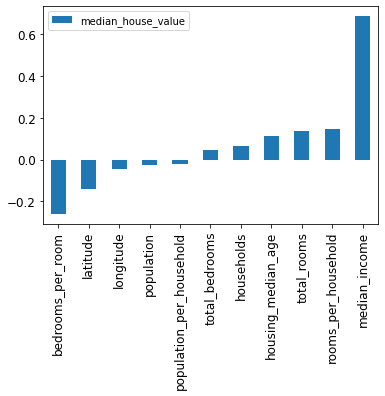

In [19]:
corr_matrix = housing4train.corr() 
df = pd.DataFrame(corr_matrix['median_house_value'])
df.sort_values(by='median_house_value',inplace=True)
df.drop(index='median_house_value',inplace=True)
df.plot(kind='bar')

In [20]:
features = list(df[abs(df['median_house_value'])>0.15].T.columns)
features

['bedrooms_per_room', 'median_income']

# Prepare Data for Machine Learning Algorithm


In [22]:
X_train = train_set.drop("median_house_value",axis=1)
y_train = train_set["median_house_value"].copy()

X_test = test_set.drop("median_house_value",axis=1)
y_test = test_set["median_house_value"].copy()

In [23]:
#Missing data
def report_missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = dataset.isnull().sum()/total 
        
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data.plot(kind='bar',y='Total',figsize=(10,6),fontsize=20)
    print(missing_data)

                    Total  Percent
total_bedrooms        158      1.0
ocean_proximity         0      NaN
median_income           0      NaN
households              0      NaN
population              0      NaN
total_rooms             0      NaN
housing_median_age      0      NaN
latitude                0      NaN
longitude               0      NaN


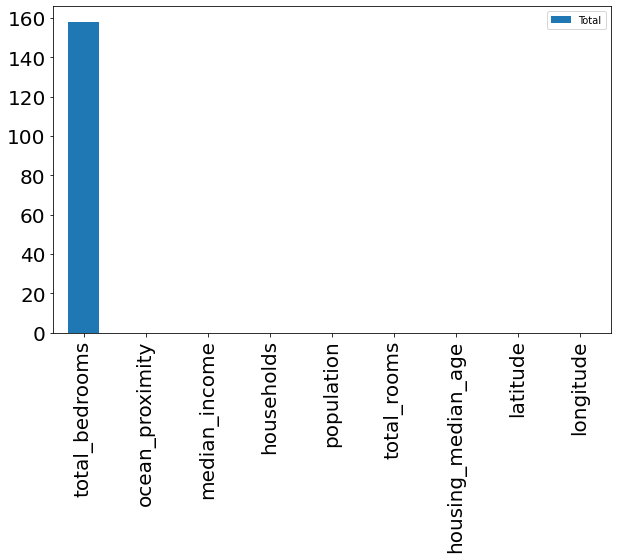

In [24]:
report_missing_data(X_train)

In [25]:
# Calculate median of total_bedrooms
median_total_bedrooms = housing4train['total_bedrooms'].median()

# Replace missing values in total_bedrooms with the median
X_train['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)
X_test['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)


# One-hot encoding

In [26]:
#Checking Categorical data
X_train['ocean_proximity'].unique()

array(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [27]:
# Create a DataFrame 'housing_num' containing numerical features by dropping the 'ocean_proximity' column from the training set.
# Define a list 'num_attribs' containing the names of numerical attributes.
housing_num = X_train.drop("ocean_proximity",axis=1)
num_attribs = list(housing_num)

In [28]:
#Script for preprocessing data using pipelines, including a custom categorical encoder and DataFrame selector.
#Credit to the original author for the implementation of the categorical encoder and DataFrame selector.
#Original Author: Guido Diepen #https://github.com/gdiepen/PythonScripts/blob/master/dataframe_onehotencoder.py

from sklearn.utils import check_array
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        X = check_array(X, accept_sparse='csc', dtype=object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=int)
        X_mask = np.ones_like(X, dtype=bool)


        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out
        
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.feature_names].values
    

# build pipelines
cat_attribs = ['ocean_proximity']
num_attribs = list(housing_num)

num_pipeline = Pipeline([
               ('selector',DataFrameSelector(num_attribs)),      
               ('std_scaler',StandardScaler()), 
                ]) 

# build categorical pipeline
cat_pipeline = Pipeline([
                  ('selector',DataFrameSelector(cat_attribs)),
                  ('cat_encoder',CategoricalEncoder(encoding='onehot-dense')),
              ])


# concatenate all the transforms using "FeatureUnion"
pipelines = FeatureUnion(transformer_list=
                             [ 
                              ('num_pipeline',num_pipeline),
                              ('cat_pipeline',cat_pipeline),
                             ])


In [29]:
X_train_prepared = pipelines.fit_transform(X_train)

In [30]:
type(X_train_prepared)

numpy.ndarray

In [31]:
X_train_prepared.shape

(16512, 13)

# Select and train models


In [60]:
# Function that evaluates the performance of a given model on a dataset
from sklearn.metrics import mean_absolute_error, mean_squared_error

def model_performance(model, X, y):
    model.fit(X, y)
    pred = model.predict(X)
    mse = mean_squared_error(pred, y)
    print("MSE:", mse)
    return model, pred


In [61]:
#linear regression
lr = LinearRegression()
lr_model,ypred = model_performance(lr,X_train_prepared, y_train) 

MSE: 4768038085.119672


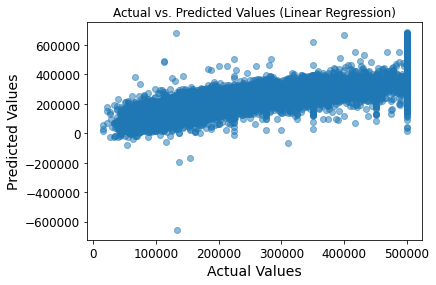

In [62]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.scatter(y_train, ypred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.show()


In [63]:
#randon forest
forest = RandomForestRegressor()
forest_model,y_pred = model_performance(forest,X_train_prepared,y_train)

MSE: 334846542.3964028


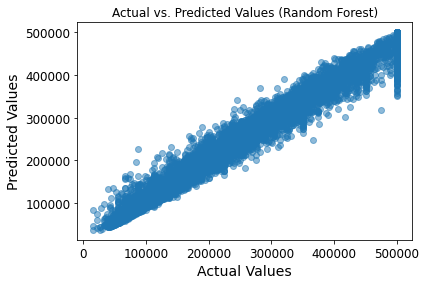

In [64]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.scatter(y_train, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.show()


In [65]:
#support vector machine
from sklearn import svm
clf  = svm.SVR(kernel='poly',degree=3)
svr_model,ypred = model_performance(clf,X_train_prepared,y_train)

MSE: 13959022835.102905


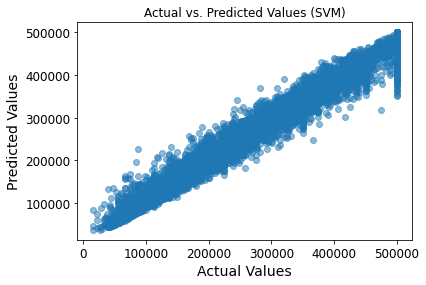

In [66]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.scatter(y_train, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (SVM)')
plt.show()


In [39]:
X_test_prepared = pipelines.transform(X_test)

In [40]:
def plot_pred_true(y_pred, y_true):
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')

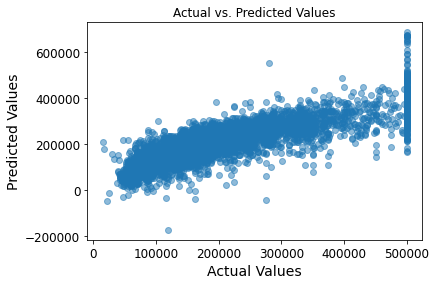

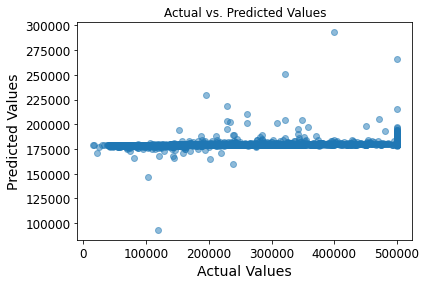

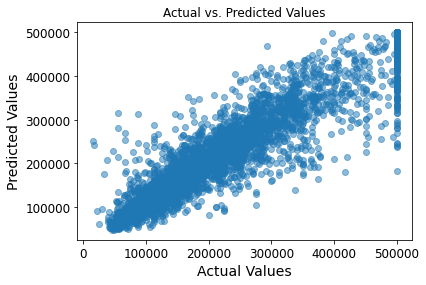

In [41]:
models = [lr_model,svr_model,forest_model]

for model in models:
    test_pred = model.predict(X_test_prepared) 
    plot_pred_true(test_pred,y_test)
    plt.show()

# Fine Tuning


In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameter distributions for Random Forest
param_dist_forest = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10, 15],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6]  # Minimum number of samples required to be at a leaf node
}



In [46]:
# Initialize Random Forest regressor
forest = RandomForestRegressor()



In [47]:
# Perform Randomized Search Cross Validation
random_search_forest = RandomizedSearchCV(forest, param_distributions=param_dist_forest,
                                          n_iter=10, scoring='neg_mean_squared_error', cv=5,
                                          random_state=42, n_jobs=-1)



In [48]:
# Fit Randomized Search CV to training data
random_search_forest.fit(X_train_prepared, y_train)

# Print best parameters and best score for Random Forest
print("Best parameters for Random Forest:", random_search_forest.best_params_)
print("Best score for Random Forest:", np.sqrt(-random_search_forest.best_score_))


Best parameters for Random Forest: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best score for Random Forest: 49860.37305609831


In [51]:
# Define hyperparameter distributions for Support Vector Machine
from sklearn.svm import SVR

param_dist_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['auto', 'scale', 0.1, 0.01],  # Kernel coefficient
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Kernel type
}



In [52]:
# Initialize Support Vector Machine regressor
svm = SVR()



In [53]:
# Perform Randomized Search Cross Validation
random_search_svm = RandomizedSearchCV(svm, param_distributions=param_dist_svm,
                                       n_iter=10, scoring='neg_mean_squared_error', cv=5,
                                       random_state=42, n_jobs=-1)



In [54]:
# Fit Randomized Search CV to training data
random_search_svm.fit(X_train_prepared, y_train)

# Print best parameters and best score for Support Vector Machine
print("Best parameters for SVM:", random_search_svm.best_params_)
print("Best score for SVM:", np.sqrt(-random_search_svm.best_score_))

Best parameters for SVM: {'kernel': 'linear', 'gamma': 'scale', 'C': 100}
Best score for SVM: 72026.82036441566


# Evaluation

In [59]:
from sklearn.metrics import mean_squared_error

# Function to calculate MSE
def calculate_mse(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Calculate MSE for each model
mse_lr = calculate_mse(lr_model, X_test_prepared, y_test)
mse_forest = calculate_mse(random_search_forest.best_estimator_, X_test_prepared, y_test)
mse_svm = calculate_mse(random_search_svm.best_estimator_, X_test_prepared, y_test)

# Print MSE for each model
print("MSE for Linear Regression:", mse_lr)
print("MSE for Random Forest Regression:", mse_forest)
print("MSE for Support Vector Machine (SVM):", mse_svm)


MSE for Linear Regression: 4535346313.418155
MSE for Random Forest Regression: 2235751806.597766
MSE for Support Vector Machine (SVM): 4903582996.659967


## Linear Regression

In [68]:
# Calculate predicted values for each model
y_pred_lr = lr_model.predict(X_test_prepared)
y_pred_forest = random_search_forest.best_estimator_.predict(X_test_prepared)
y_pred_svm = random_search_svm.best_estimator_.predict(X_test_prepared)

# Create DataFrames for each model
df_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})

# Calculate the difference between actual and predicted values
df_lr['Difference'] = df_lr['Actual'] - df_lr['Predicted']


# Display the final tables for each model
print(df_lr)



         Actual      Predicted    Difference
5241   500001.0  419992.519702  80008.480298
10970  240300.0  264754.060101 -24454.060101
20351  218200.0  229040.783208 -10840.783208
6568   182100.0  204241.233711 -22141.233711
13285  121300.0  165967.306167 -44667.306167
...         ...            ...           ...
20519   76400.0  129217.677251 -52817.677251
17430  134000.0  197966.398994 -63966.398994
4019   311700.0  289710.255760  21989.744240
12107  133500.0  189541.901788 -56041.901788
2398    78600.0  124926.719095 -46326.719095

[4128 rows x 3 columns]


## Random Forest

In [70]:
df_forest = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_forest})


# Calculate the difference between actual and predicted values
df_forest['Difference'] = df_forest['Actual'] - df_forest['Predicted']
print(df_forest)



         Actual      Predicted    Difference
5241   500001.0  485503.405406  14497.594594
10970  240300.0  223041.117316  17258.882684
20351  218200.0  204946.365705  13253.634295
6568   182100.0  214698.521068 -32598.521068
13285  121300.0  140677.927249 -19377.927249
...         ...            ...           ...
20519   76400.0   91095.908874 -14695.908874
17430  134000.0  145696.819312 -11696.819312
4019   311700.0  276275.240332  35424.759668
12107  133500.0  151453.063492 -17953.063492
2398    78600.0  100535.006902 -21935.006902

[4128 rows x 3 columns]


## SVM

In [71]:
df_svm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svm})
df_svm['Difference'] = df_svm['Actual'] - df_svm['Predicted']
print(df_svm)

         Actual      Predicted     Difference
5241   500001.0  393426.434815  106574.565185
10970  240300.0  246888.625545   -6588.625545
20351  218200.0  201555.807652   16644.192348
6568   182100.0  176036.647434    6063.352566
13285  121300.0  150168.049267  -28868.049267
...         ...            ...            ...
20519   76400.0  114065.023380  -37665.023380
17430  134000.0  165000.203945  -31000.203945
4019   311700.0  264193.025526   47506.974474
12107  133500.0  179260.579948  -45760.579948
2398    78600.0  129223.057830  -50623.057830

[4128 rows x 3 columns]
